## Self

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

from nltk.tokenize import regexp_tokenize, sent_tokenize, word_tokenize
from collections import Counter, defaultdict
from nltk.corpus import stopwords

import nltk


#### Contents:

[first look txt](#first)

[1) Data loading & Cleaning](#data_cleaning)

[2) EDA](#eda)

[3) Topics in dreams](#topics)



### first look txt
<a id="first"></a>

In [2]:
# load data
self = open('self_dreams.txt', encoding="utf8")

self.read()

'71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,"Es escribiendo como pruebo","La prueba de escribir a mi antojo que te cojo",{prueba,antojo},0,"2018-03-13 02:52:57.359548",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,"2018-03-13 02:52:57.371769","2018-03-13 02:52:57.371777",https://images.unsplash.com/photo-1514283880237-cd47bb2961d2?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjE4MzIzfQ&s=c319a47eb1e7d7d5cfa8c0aab4d2fdda,happy,nightmare,"Im possesed",1,es,male,"",single,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB14240,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940,""\n2c312d03-f585-4169-a3cb-ac94d5d23ecf,"","We couldn\'t recognize any words in your recording",{},0,"2018-03-14 19:30:32.014896",d0d71f11-5386-49d9-87b8-027710556e82,d0d71f11-5386-49d9-87b8-027710556e82,"2018-03-14 19:30:32.031707","2018-03-14 19:31:44.844306",https://images.unsplash.com/photo-1518957758258-cebb05097e38?ixl

In [3]:
with open('self_dreams.txt', encoding="utf8") as fp:
    for cnt, line in enumerate(fp):
        print(cnt, line)

0 71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,"Es escribiendo como pruebo","La prueba de escribir a mi antojo que te cojo",{prueba,antojo},0,"2018-03-13 02:52:57.359548",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,"2018-03-13 02:52:57.371769","2018-03-13 02:52:57.371777",https://images.unsplash.com/photo-1514283880237-cd47bb2961d2?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjE4MzIzfQ&s=c319a47eb1e7d7d5cfa8c0aab4d2fdda,happy,nightmare,"Im possesed",1,es,male,"",single,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB14240,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940,""

1 2c312d03-f585-4169-a3cb-ac94d5d23ecf,"","We couldn't recognize any words in your recording",{},0,"2018-03-14 19:30:32.014896",d0d71f11-5386-49d9-87b8-027710556e82,d0d71f11-5386-49d9-87b8-027710556e82,"2018-03-14 19:30:32.031707","2018-03-14 19:31:44.844306",https://images.unsplash.com/photo-1518957758258-cebb05097e38?i

In [4]:
# create dataframe self
self = pd.DataFrame(columns=['all_'])

# fill dataframe
with open('self_dreams.txt', encoding="utf8") as fp:
    i = 0
    for line in fp:
        self.loc[i] = line
        i += 1
        
self.all_[44]
self.all_[0]
self.head()

,all_
0,"71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,""Es escri..."
1,"2c312d03-f585-4169-a3cb-ac94d5d23ecf,"""",""We co..."
2,"9e2b0b6a-3900-4a0e-8fce-ffe51c35a512,""Prueba d..."
3,"6e556661-e37c-4e7a-af47-ba2423c8a5ba,""Con Alej..."
4,"b774eea4-c11b-4602-844f-8ecd35338971,""Nadando ..."


In [5]:
# create dataframe self
self = pd.DataFrame(columns=['all_'])

# fill dataframe
with open('self_dreams.txt', encoding="utf8") as fp:
    i = 0
    for line in fp:
        self.loc[i] = line
        i += 1
    
    for j in range(60):
        self['column{}'.format(j+1)] = self['all_'].apply(lambda x: x.split(',')[j] if len(x.split(','))>j else None)
        
self.all_[44]
self.all_[0]
self

,all_,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column51,column52,column53,column54,column55,column56,column57,column58,column59,column60
0,"71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,""Es escri...",71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,"""Es escribiendo como pruebo""","""La prueba de escribir a mi antojo que te cojo""",{prueba,antojo},0,"""2018-03-13 02:52:57.359548""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,...,None,None,None,None,None,None,None,None,None,None
1,"2c312d03-f585-4169-a3cb-ac94d5d23ecf,"""",""We co...",2c312d03-f585-4169-a3cb-ac94d5d23ecf,"""""","""We couldn't recognize any words in your recor...",{},0,"""2018-03-14 19:30:32.014896""",d0d71f11-5386-49d9-87b8-027710556e82,d0d71f11-5386-49d9-87b8-027710556e82,"""2018-03-14 19:30:32.031707""",...,None,None,None,None,None,None,None,None,None,None
2,"9e2b0b6a-3900-4a0e-8fce-ffe51c35a512,""Prueba d...",9e2b0b6a-3900-4a0e-8fce-ffe51c35a512,"""Prueba de Us""","""Hola estoy grabando un sueño y esto es una pr...","""{prueba",sueño,"mudo}""",0,"""2018-03-12 16:46:28.938392""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,...,None,None,None,None,None,None,None,None,None,None
3,"6e556661-e37c-4e7a-af47-ba2423c8a5ba,""Con Alej...",6e556661-e37c-4e7a-af47-ba2423c8a5ba,"""Con Alejandro""","""Estoy aquí ha soñado con alejandro no y de qu...",{alejandro},0,"""2018-03-12 18:47:38.440038""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,"""2018-03-12 18:47:38.458568""",...,None,None,None,None,None,None,None,None,None,None
4,"b774eea4-c11b-4602-844f-8ecd35338971,""Nadando ...",b774eea4-c11b-4602-844f-8ecd35338971,"""Nadando en el sol""","""Estaba soñando que estaba en el sol y nadando...",{sol,sol,acuerdo},0,"""2018-03-12 19:53:30.520054""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,...,None,None,None,None,None,None,None,None,None,None
5,"2cc17e81-941b-42e8-9ac5-e476a5408de0,""Un Betis...",2cc17e81-941b-42e8-9ac5-e476a5408de0,"""Un Betis libre ""","""He soñado que me despertaba con la camiseta d...",{betis,camiseta,campo,final},0,"""2018-03-12 20:34:34.322724""",...,None,None,None,None,None,None,None,None,None,None
6,"32330696-fff7-405c-bae9-954c5e1782fa,Industrie...",32330696-fff7-405c-bae9-954c5e1782fa,Industrie,"""Ich stand plötzlich auf zwar dunkel. ich wür...","""{industrie",kopf,metalltüren,"bewegen}""",0,"""2018-03-12 23:30:46.902852""",...,None,None,None,None,None,None,None,None,None,None
7,"cba2bdcb-f1ca-4510-94e9-22f6faf826a0,""App de i...",cba2bdcb-f1ca-4510-94e9-22f6faf826a0,"""App de idiomas""","""Hoy he soñado no se la aplicación de lo de lo...","""{aplicación","idiomas}""",0,"""2018-03-13 02:18:30.886755""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,...,None,None,None,None,None,None,None,None,None,None
8,"d0b78c60-f770-4173-8118-8707c4bb7571,""El colim...",d0b78c60-f770-4173-8118-8707c4bb7571,"""El colimero volador""","""Anoche soñé que volaba por los cielos yo ya l...","""{cielos",montañas,"monterrey}""",0,"""2018-03-14 03:06:25.787981""",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,...,None,None,None,None,None,None,None,None,None,None
9,"d5f4ff81-e40e-4b44-86c5-f95d37cc9360,test,""Hel...",d5f4ff81-e40e-4b44-86c5-f95d37cc9360,test,"""Hello","i'm a gorilla.""",{gorilla},0,"""2018-03-14 18:39:02.891594""",33a7fe5f-8c02-45d8-be2b-456380d85fef,33a7fe5f-8c02-45d8-be2b-456380d85fef,...,None,None,None,None,None,None,None,None,None,None


In [6]:
'71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,"Es escribiendo como pruebo","La prueba de escribir a mi antojo que te cojo",{prueba,antojo},0,"2018-03-13 02:52:57.359548",3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,"2018-03-13 02:52:57.371769","2018-03-13 02:52:57.371777",https://images.unsplash.com/photo-1514283880237-cd47bb2961d2?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjE4MzIzfQ&s=c319a47eb1e7d7d5cfa8c0aab4d2fdda,happy,nightmare,"Im possesed",1,es,male,"",single,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB14240,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940,""\n'.split(',')

['71edaefb-249c-43ee-b2a7-2bc8a98e6e1e',
 '"Es escribiendo como pruebo"',
 '"La prueba de escribir a mi antojo que te cojo"',
 '{prueba',
 'antojo}',
 '0',
 '"2018-03-13 02:52:57.359548"',
 '3f3e2e75-2042-4093-9e3f-d4bbfbef66f3',
 '3f3e2e75-2042-4093-9e3f-d4bbfbef66f3',
 '"2018-03-13 02:52:57.371769"',
 '"2018-03-13 02:52:57.371777"',
 'https://images.unsplash.com/photo-1514283880237-cd47bb2961d2?ixlib=rb-0.3.5&ixid=eyJhcHBfaWQiOjE4MzIzfQ&s=c319a47eb1e7d7d5cfa8c0aab4d2fdda',
 'happy',
 'nightmare',
 '"Im possesed"',
 '1',
 'es',
 'male',
 '""',
 'single',
 'heterosexual',
 'right',
 'psychology',
 'teaching',
 '"Seville',
 ' Spain"',
 '0101000020E610000048066FFE15F017C0A38F9EC7CDB14240',
 '"Monterrey',
 ' Nuevo Leon',
 ' Mexico"',
 '0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940',
 '""\n']

### 1) Data loading & Cleaning
<a id="data_cleaning"></a>

#### loading and overview

In [7]:
# loading the data
data = pd.read_csv('self_dreams.txt', error_bad_lines=False, header=-1)


# looking at the columns:
for i in range(len(data.columns)):
    print("{} column:\n".format(i), data[i].tolist(), "\n")

0 column:
 ['71edaefb-249c-43ee-b2a7-2bc8a98e6e1e', '2c312d03-f585-4169-a3cb-ac94d5d23ecf', '9e2b0b6a-3900-4a0e-8fce-ffe51c35a512', '6e556661-e37c-4e7a-af47-ba2423c8a5ba', '32330696-fff7-405c-bae9-954c5e1782fa', 'cba2bdcb-f1ca-4510-94e9-22f6faf826a0', 'd0b78c60-f770-4173-8118-8707c4bb7571', 'd5f4ff81-e40e-4b44-86c5-f95d37cc9360', 'ad50b7a2-bbb0-4360-8529-ae27900b1035', 'd88d40bf-49aa-4034-af29-628ca2b90bd9', 'a82cc4d9-c0a6-4d77-970e-0f18fbe8f82d', '10d6b053-73a0-4bdb-b2a3-d7472dfe1837', '0af19e21-8b87-4868-aee2-bb8feacc40d3', '44f4689d-7745-4be4-9134-3fa921301ff9', 'bbd21605-4321-41e0-8d34-e006fbe26b14', 'a6e1f1d1-a84f-4a2e-8a45-cdaaa2afa52c', '437dc140-cccb-4ccd-908e-acdc1622ac14', '8f8415cc-84ae-43d7-93db-bb8900bca001', '5f2da27a-fef5-4441-8f13-2281812519e2', 'eec31628-e8ab-44a8-921a-6736df094164', '899c5a1a-e101-4fb7-861b-163e7a4df105', '1c5fcbc4-1219-40fb-ba56-83163024e2b4', '1f3b95e6-41eb-42fb-9bfd-664ea499844b', '58724e90-b661-462d-973a-a601787eb43f', '59e9b0da-9cc4-4edc-ad82-881

b'Skipping line 5: expected 29 fields, saw 30\nSkipping line 6: expected 29 fields, saw 31\nSkipping line 11: expected 29 fields, saw 30\nSkipping line 15: expected 29 fields, saw 34\nSkipping line 16: expected 29 fields, saw 31\nSkipping line 18: expected 29 fields, saw 30\nSkipping line 20: expected 29 fields, saw 44\nSkipping line 22: expected 29 fields, saw 31\nSkipping line 26: expected 29 fields, saw 32\nSkipping line 28: expected 29 fields, saw 40\nSkipping line 30: expected 29 fields, saw 32\nSkipping line 34: expected 29 fields, saw 31\nSkipping line 35: expected 29 fields, saw 33\nSkipping line 36: expected 29 fields, saw 43\nSkipping line 37: expected 29 fields, saw 42\nSkipping line 40: expected 29 fields, saw 32\nSkipping line 41: expected 29 fields, saw 37\nSkipping line 43: expected 29 fields, saw 34\nSkipping line 44: expected 29 fields, saw 34\nSkipping line 45: expected 29 fields, saw 37\nSkipping line 46: expected 29 fields, saw 32\nSkipping line 47: expected 29 fiel

In [8]:
# giving the columns these names:
data.columns = ['code_1', 'title', 'dream', 'topics_merge1', 'topics_merge2', 'time_1', 'code_2', 'code_3', 'code_or_time',
                'time_2', 'links', 'links_or_emotion', 'type_of_dream', 'why_dream_1', 'why_dream_2', 'language', 'gender', 
                'birthday', 'civil_state', 'sexuality', 'laterality', 'degree', 'profession', 'born_in', 'code_4', 
               'living_in', 'code_5', 'code_6', 'nan_column']

In [9]:
# head
data.head(5)

,code_1,title,dream,topics_merge1,topics_merge2,time_1,code_2,code_3,code_or_time,time_2,...,sexuality,laterality,degree,profession,born_in,code_4,living_in,code_5,code_6,nan_column
0,71edaefb-249c-43ee-b2a7-2bc8a98e6e1e,Es escribiendo como pruebo,La prueba de escribir a mi antojo que te cojo,{prueba,antojo},0,2018-03-13 02:52:57.359548,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,2018-03-13 02:52:57.371769,...,single,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB1...,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF...,NaN
1,2c312d03-f585-4169-a3cb-ac94d5d23ecf,NaN,We couldn't recognize any words in your recording,{},0,2018-03-14 19:30:32.014896,d0d71f11-5386-49d9-87b8-027710556e82,d0d71f11-5386-49d9-87b8-027710556e82,2018-03-14 19:30:32.031707,2018-03-14 19:31:44.844306,...,heterosexual,right,business,business,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB1...,"Amsterdam, Netherlands",0101000020E61000004CB7DBE4A69413409EFB613A632F...,NaN,NaN
2,9e2b0b6a-3900-4a0e-8fce-ffe51c35a512,Prueba de Us,Hola estoy grabando un sueño y esto es una pru...,"{prueba,sueño,mudo}",0,2018-03-12 16:46:28.938392,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,2018-03-12 16:46:28.958041,2019-04-17 13:35:55.381068,...,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB1...,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF...,NaN,NaN
3,6e556661-e37c-4e7a-af47-ba2423c8a5ba,Con Alejandro,Estoy aquí ha soñado con alejandro no y de que...,{alejandro},0,2018-03-12 18:47:38.440038,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,3f3e2e75-2042-4093-9e3f-d4bbfbef66f3,2018-03-12 18:47:38.458568,2019-04-28 11:34:18.967989,...,heterosexual,right,psychology,teaching,"Seville, Spain",0101000020E610000048066FFE15F017C0A38F9EC7CDB1...,"Monterrey, Nuevo Leon, Mexico",0101000020E6100000A0B657303B1459C01EF8BDF2C5AF...,NaN,NaN
4,32330696-fff7-405c-bae9-954c5e1782fa,Industrie,Ich stand plötzlich auf zwar dunkel. ich würd...,"{industrie,kopf,metalltüren,bewegen}",0,2018-03-12 23:30:46.902852,33a7fe5f-8c02-45d8-be2b-456380d85fef,33a7fe5f-8c02-45d8-be2b-456380d85fef,2018-03-12 23:30:46.91681,2019-04-28 11:34:49.58082,...,heterosexual,right,technology,technology,"Madrid, Spain",0101000020E61000005FF6A1C15CA10DC07F6374E55835...,"Berlin, Germany",0101000020E6100000CEC4742156CF2A40205A86938F42...,NaN,NaN


#### Column 'topics'

In [10]:
# topics column

# replace numbers in column 'topics_merge2', for further merging
for i in range(10):
    data['topics_merge2'] = data['topics_merge2'].replace({str(i): ''})

#  merge the topics columns
data['topics'] = [','.join(i) for i in zip(data['topics_merge1'], data['topics_merge2'])]

# modifying strings (immutable)
data['topics'] = [list(i) for i in data['topics']]

new_column = []

for i in range(len(data['topics'])):
    new_line = ''
    for char in data['topics'][i][:-1]:
        if char not in ['{', '}', '{}']:
            new_line = new_line + char 
    new_column.append(new_line)

data['topics'] = new_column
    
# check
data['topics'].head(10)

0                                        prueba,antojo
1                                                     
2                                    prueba,sueño,mudo
3                                            alejandro
4                   industrie,kopf,metalltüren,bewegen
5                                   aplicación,idiomas
6                            cielos,montañas,monterrey
7                                              gorilla
8                                          zoo,ständer
9    Aurora,barco,recuerdo,Arturo,Teresa,gente,mar,...
Name: topics, dtype: object

In [11]:
# delete the columns no longer necessary
del data['topics_merge1']
del data['topics_merge2']

#### Column 'title'

In [12]:
# column 'title' - ok
print([print("title dream {}:\n".format(i), data['title'][i], "\n") for i in range(len(data['title']))])

title dream 0:
 Es escribiendo como pruebo 

title dream 1:
 nan 

title dream 2:
 Prueba de Us 

title dream 3:
 Con Alejandro 

title dream 4:
 Industrie 

title dream 5:
 App de idiomas 

title dream 6:
 El colimero volador 

title dream 7:
 test 

title dream 8:
 ständer in zoo 

title dream 9:
 En una novela 

title dream 10:
 Divergent 

title dream 11:
 El carro 

title dream 12:
 Meusers 

title dream 13:
 nan 

title dream 14:
 Stroke 

title dream 15:
 El ex de mi amiga 

title dream 16:
 nan 

title dream 17:
 Taburete 

title dream 18:
 Cancer 

title dream 19:
 nan 

title dream 20:
 Ex roomie 

title dream 21:
 Rapidos y Furiosos 

title dream 22:
 Veganismo Americano 

title dream 23:
 My first dream 

title dream 24:
 Todos son mis amigos 

title dream 25:
 nan 

title dream 26:
 nan 

title dream 27:
 strange night 

title dream 28:
 Mala amiga 

title dream 29:
 Vecinas o mamá? 

title dream 30:
 nan 

title dream 31:
 nan 

title dream 32:
 Malos días  

title dream 

#### Column 'dream' 

In [13]:
# column 'dream' 
print([print("dream {}:\n".format(i), data['dream'][i], "\n") for i in range(len(data['dream']))])

dream 0:
 La prueba de escribir a mi antojo que te cojo 

dream 1:
 We couldn't recognize any words in your recording 

dream 2:
 Hola estoy grabando un sueño y esto es una prueba para ver cómo se cuelga en el mundo 

dream 3:
 Estoy aquí ha soñado con alejandro no y de que nos iba muy bien y salía todo fenomenal 

dream 4:
 Ich stand plötzlich auf zwar dunkel.  ich würde ein industrie geräusch  beim bewegen von großen metalltüren  verdünnte von selvatelle weg  ich kam und ging.  gründe meinem kopf 

dream 5:
 Hoy he soñado no se la aplicación de lo de los idiomas que salía salía bastante bastante bastante bien 

dream 6:
 Anoche soñé que volaba por los cielos yo ya las montañas de monterrey desde ahí 

dream 7:
 Hello, i'm a gorilla. 

dream 8:
 Heute habe ich geträumt, ich habe einen ständer und das und so. 

dream 9:
 Sé que no solo soñé con esto pero es mi recuerdo más vivo.
Soñé que Teresa, Arturo, Aurora y yo estábamos en un barco enorme y que Aurora le estaba contando a Teresa l

In [14]:
# replace no record default message with nothing
data['dream'] = data['dream'].replace("We couldn't recognize any words in your recording", "")

# recheck above

#### Column 'time_1'

In [15]:
# column 'time_1'

# replace nulls
data['time_1'] = data['time_1'].replace('0', np.nan)

# convert to datetime
data['time_1'] = pd.to_datetime(data['time_1'], format='%Y-%m-%d %H:%M:%S')

# check column
data['time_1'].head(10).tolist()   # some nulls

[NaT,
 Timestamp('2018-03-14 19:30:32.014896'),
 Timestamp('2018-03-12 16:46:28.938392'),
 Timestamp('2018-03-12 18:47:38.440038'),
 Timestamp('2018-03-12 23:30:46.902852'),
 Timestamp('2018-03-13 02:18:30.886755'),
 Timestamp('2018-03-14 03:06:25.787981'),
 Timestamp('2018-03-14 18:39:02.891594'),
 Timestamp('2018-04-28 00:02:32.413000'),
 Timestamp('2018-03-17 14:39:55.833017')]

#### Column 'type_of_dream'

In [16]:
# column 'type_of_dream' - ok
print([print("dream {}:\n".format(i), data['type_of_dream'][i], "\n") for i in range(len(data['type_of_dream']))])

dream 0:
 happy 

dream 1:
 nan 

dream 2:
 bizarre 

dream 3:
 precognitiv 

dream 4:
 bizarre 

dream 5:
 precognitiv 

dream 6:
 bizarre 

dream 7:
 bizarre 

dream 8:
 lucid 

dream 9:
 mundane 

dream 10:
 mundane 

dream 11:
 bizarre 

dream 12:
 fear 

dream 13:
 nan 

dream 14:
 fear 

dream 15:
 bizarre 

dream 16:
 mundane 

dream 17:
 nan 

dream 18:
 bizarre 

dream 19:
 nan 

dream 20:
 bizarre 

dream 21:
 mundane 

dream 22:
 nightmare 

dream 23:
 bizarre 

dream 24:
 mundane 

dream 25:
 nan 

dream 26:
 nan 

dream 27:
 transcendent 

dream 28:
 bizarre 

dream 29:
 surprised 

dream 30:
 nan 

dream 31:
 nan 

dream 32:
 lucid 

dream 33:
 disgusted 

dream 34:
 nightmare 

dream 35:
 bizarre 

dream 36:
 bizarre 

dream 37:
 eureka 

dream 38:
 bizarre 

dream 39:
 bizarre 

dream 40:
 bizarre 

dream 41:
 lucid 

dream 42:
 bizarre 

dream 43:
 neutral 

dream 44:
 bizarre 

dream 45:
 bizarre 

dream 46:
 mundane 

dream 47:
 lucid 

dream 48:
 bizarre 

dream 49:

#### Column 'why_dream'

In [17]:
# column 'why_dream'
data[['why_dream_1', 'why_dream_2']]   # seems like it's the _1 but _2 if filled with characters 

,why_dream_1,why_dream_2
0,nightmare,Im possesed
1,NaN,0
2,NaN,1
3,Porke hoy estuve con el,1
4,NaN,0
5,Porke si,1
6,Porke me gusta volar,1
7,fhhfy\r\n,0
8,NaN,0
9,Soñé eso porque es la novela que estoy viendo ...,1


In [18]:
# it's either filled or with 1 or 0
data['why_dream_2'].value_counts()

1                                                                                                                      44
0                                                                                                                      20
Estaba viendo pretty little liars antes de dormir                                                                       1
Estaba viendo grey’s anatomy                                                                                            1
Las vecinas en la noche estaban borrachas y estaban gritando, se filtraron en mi sueño.                                 1
Im possesed                                                                                                             1
Tengo miedo por la situacion financiera de Kasimir?                                                                     1
Porke no era un sueño de verdad                                                                                         1
Creo porque mi papá me r

In [19]:
# create 'why_dream' column
new_why = []

for (i, j) in zip(data['why_dream_1'], data['why_dream_2']):
    if np.logical_or(j == '0', j == '1'):
        new_why.append(i)
    else:
        new_why.append(j)

data['why_dream'] = new_why
data['why_dream'].tolist()

['Im possesed',
 nan,
 nan,
 'Porke hoy estuve con el',
 nan,
 'Porke si',
 'Porke me gusta volar',
 'fhhfy\r\n',
 nan,
 'Soñé eso porque es la novela que estoy viendo pero no sé porqué soñé ese contexto.',
 'No sé',
 'Porque mis papas no me dejan manejar en estados unidos y estoy aqui',
 'Tengo miedo por la situacion financiera de Kasimir?',
 nan,
 'Estaba viendo grey’s anatomy ',
 'Porque vi al ex de mi amiga ese dia',
 'Ni idea',
 'Idk\r\n',
 'No tengo la menor idea\r\n',
 nan,
 'Porque quiero vivir en un departamento',
 'Tal vez tenía mucha energía ',
 'Por la violencia que veo en redes sociales, por qué mi mamá es vegana, siempre sueño que alguien esta atrás de mi \r\n',
 'i dont know',
 'Porque me gustaría que pasara',
 nan,
 nan,
 'it was a strange night',
 'Estuve viendo una película similar antes de quedarme dormida ',
 'Las vecinas en la noche estaban borrachas y estaban gritando, se filtraron en mi sueño.',
 nan,
 nan,
 'Todo me esta saliendo mal últimamente \r\n',
 'Creo po

In [20]:
# delete the no longer necessary columns
del data['why_dream_1']
del data['why_dream_2']

#### Column 'language'

In [21]:
# column 'language'
data[['language', 'dream']] # ---> '1' and '0' 

,language,dream
0,1,La prueba de escribir a mi antojo que te cojo
1,es,
2,es,Hola estoy grabando un sueño y esto es una pru...
3,es,Estoy aquí ha soñado con alejandro no y de que...
4,de,Ich stand plötzlich auf zwar dunkel. ich würd...
5,es,Hoy he soñado no se la aplicación de lo de los...
6,es,Anoche soñé que volaba por los cielos yo ya la...
7,en,"Hello, i'm a gorilla."
8,de,"Heute habe ich geträumt, ich habe einen stände..."
9,es,Sé que no solo soñé con esto pero es mi recuer...


In [22]:
# I'm going to replace them with 'es', but don't know why the '0' and '1' appears in the first place ---> check later
data['language'] = data['language'].replace('0', 'es').replace('1', 'es')
data['language'].head(12).tolist()

['es', 'es', 'es', 'es', 'de', 'es', 'es', 'en', 'de', 'es', 'en', 'es']

#### Column 'gender'

In [23]:
# column 'gender'
data['gender'].head(15)

0         es
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9     female
10    female
11    female
12        es
13    female
14        es
Name: gender, dtype: object

In [24]:
# replace if not male or female
to_rep = set(data['gender'][~data['gender'].isin(['male', 'female'])].values)

[data['gender'].replace(i, np.nan, inplace=True) for i in to_rep]

data['gender'].head(15).tolist()

[nan,
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 nan,
 'female',
 nan]

#### Column 'birthday'

In [25]:
# column 'birthday'

data['birthday'].head(12)

0                    male
1     1984-07-17 23:00:00
2                     NaN
3                     NaN
4     1982-09-20 23:00:00
5                     NaN
6                     NaN
7     1982-09-20 23:00:00
8     1982-09-20 23:00:00
9     1999-08-02 23:00:00
10    1998-07-09 23:00:00
11    1998-03-27 00:00:00
Name: birthday, dtype: object

In [26]:
# convert floats to str
data['birthday'] = data['birthday'].astype(str)

# create new birthday column
new_birth = []

for i in data['birthday']:
    if np.logical_or(i.startswith('1'), i.startswith('2')):
        new_birth.append(i)
    else:
        new_birth.append(np.nan)

data['birthday'] = pd.to_datetime(new_birth, format='%Y-%m-%d %H:%M:%S')
data['birthday'].head(12)

0                    NaT
1    1984-07-17 23:00:00
2                    NaT
3                    NaT
4    1982-09-20 23:00:00
5                    NaT
6                    NaT
7    1982-09-20 23:00:00
8    1982-09-20 23:00:00
9    1999-08-02 23:00:00
10   1998-07-09 23:00:00
11   1998-03-27 00:00:00
Name: birthday, dtype: datetime64[ns]

#### Column 'civil_state'

In [27]:
# column 'civil_state'
data['civil_state'].tolist()

[nan,
 'cohabiting',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 '1989-10-26 00:00:00',
 'single',
 '1999-07-03 23:00:00',
 'single',
 nan,
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 '1998-04-23 23:00:00',
 'single',
 'single',
 'single',
 nan,
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 '2000-10-20 23:00:00',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'cohabiting',
 'single',
 'single',
 nan,
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'cohabiting',
 'single',
 'single',
 'single']

In [28]:
# replacing the errors: when it starts with a date or nan ----> later see the options and use that, it's safer

# convert floats to str
data['civil_state'] = data['civil_state'].astype(str)

# create new birthday column
new_cstate = []

for i in data['civil_state']:
    if np.logical_or(i.startswith('1'), i.startswith('2')):
        new_cstate.append('nan')
    else:
        new_cstate.append(i)

data['civil_state'] = new_cstate
data['civil_state'] = data['civil_state'].replace('nan', np.nan)
data['civil_state'].head(15).tolist()

[nan,
 'cohabiting',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 'single',
 nan,
 'single',
 nan]

#### Column 'sexuality'

In [29]:
# column 'sexuality' - ok
data['sexuality'].tolist()

['single',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 nan,
 'heterosexual',
 nan,
 'heterosexual',
 'single',
 'heterosexual',
 nan,
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'single',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 nan,
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'single',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'single',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'heterosexual',
 'h

#### Column 'laterality'

In [30]:
# column 'laterality'
data['laterality'].tolist()

['heterosexual',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 nan,
 nan,
 'heterosexual',
 'right',
 nan,
 'right',
 'right',
 nan,
 'right',
 'right',
 'right',
 'right',
 'right',
 nan,
 nan,
 'right',
 'right',
 'heterosexual',
 'right',
 'right',
 'right',
 nan,
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'heterosexual',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'heterosexual',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 nan,
 nan,
 'right',
 'right',
 'right',
 'right',
 'right']

In [31]:
# replace where it's not either 'right', 'left' or 'ambidextrous'

# convert floats to str
data['laterality'] = data['laterality'].astype(str)

# options
correct_lat = ['right', 'left', 'ambidextrous']

new_lat = []

for i in data['laterality']:
    if i not in correct_lat:
        new_lat.append(np.nan)
    else:
        new_lat.append(i)

data['laterality'] = new_lat

# check
data['laterality'].head(16).tolist()

[nan,
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 nan,
 nan,
 nan,
 'right']

#### column 'degree'

In [32]:
data['degree'].tolist()

['right',
 'business',
 'psychology',
 'psychology',
 'technology',
 'psychology',
 'psychology',
 'technology',
 'technology',
 'psychology',
 'psychology',
 'none',
 nan,
 'design',
 'right',
 'none',
 nan,
 'none',
 'psychology',
 'design',
 'psychology',
 'psychology',
 'psychology',
 'technology',
 'psychology',
 'design',
 'design',
 'technology',
 'psychology',
 'right',
 'psychology',
 'psychology',
 'psychology',
 nan,
 'psychology',
 'none',
 'technology',
 'psychology',
 'psychology',
 'psychology',
 'psychology',
 'psychology',
 'psychology',
 'right',
 'psychology',
 'psychology',
 'technology',
 'psychology',
 'none',
 'none',
 'technology',
 'psychology',
 'psychology',
 'psychology',
 'business',
 'technology',
 'technology',
 'right',
 'psychology',
 'none',
 'finance',
 'psychology',
 'psychology',
 'psychology',
 'psychology',
 'psychology',
 'technology',
 'business',
 'none',
 'none',
 'none']

In [33]:
# replace where it's 'right' ---> see errors why

# convert floats to str
data['degree'] = data['degree'].astype(str)

# options
wrong_options = ['right']

new_degree = []

for i in data['degree']:
    if i in wrong_options:
        new_degree.append(np.nan)
    else:
        new_degree.append(i)

data['degree'] = new_degree

# check
data['degree'].head(12).tolist()

[nan,
 'business',
 'psychology',
 'psychology',
 'technology',
 'psychology',
 'psychology',
 'technology',
 'technology',
 'psychology',
 'psychology',
 'none']

#### column 'profession'

In [34]:
data['profession'].tolist()  # - ok

['psychology',
 'business',
 'teaching',
 'teaching',
 'technology',
 'teaching',
 'teaching',
 'technology',
 'technology',
 'unemployed',
 'other',
 'unemployed',
 nan,
 'other',
 'none',
 'unemployed',
 'teaching',
 'unemployed',
 'unemployed',
 'other',
 'unemployed',
 'unemployed',
 'unemployed',
 'technology',
 'unemployed',
 'other',
 'other',
 'technology',
 'unemployed',
 'psychology',
 'teaching',
 'teaching',
 'unemployed',
 nan,
 'unemployed',
 'unemployed',
 'technology',
 'unemployed',
 'unemployed',
 'unemployed',
 'unemployed',
 'unemployed',
 'unemployed',
 'psychology',
 'unemployed',
 'unemployed',
 'technology',
 'unemployed',
 nan,
 'unemployed',
 'technology',
 'unemployed',
 'unemployed',
 'unemployed',
 'business',
 'technology',
 'technology',
 'psychology',
 'teaching',
 'unemployed',
 'business',
 'teaching',
 'teaching',
 'unemployed',
 'human_resources',
 'human_resources',
 'technology',
 'business',
 'unemployed',
 'unemployed',
 'unemployed']

#### column 'born_in'

In [35]:
data['born_in'].tolist()

['teaching',
 'Seville, Spain',
 'Seville, Spain',
 'Seville, Spain',
 'Madrid, Spain',
 'Seville, Spain',
 'Seville, Spain',
 'Madrid, Spain',
 'Madrid, Spain',
 'Torreón, Coahuila, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'teaching',
 nan,
 'other',
 'Monterrey, Nuevo Leon, Mexico',
 'Madrid, Spain',
 'Monterrey, Nuevo Leon, Mexico',
 'Hermosillo, Sonora, Mexico',
 nan,
 'Torreón, Coahuila, Mexico',
 'Torreón, Coahuila, Mexico',
 'El Paso, TX, USA',
 'Madrid, Spain',
 'Torreón, Coahuila, Mexico',
 nan,
 nan,
 'Madrid, Spain',
 'El Paso, TX, USA',
 'unemployed',
 'Seville, Spain',
 'Seville, Spain',
 'El Paso, TX, USA',
 nan,
 'El Paso, TX, USA',
 'Monterrey, Nuevo Leon, Mexico',
 'Madrid, Spain',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'El Paso, TX, USA',
 'El Paso, TX, USA',
 'El Paso, TX, USA',
 'Torreón, Coahuila, Mexico',
 'unemployed',
 'El Paso, TX, USA',
 'El Paso, TX, USA',
 'Madrid, Spain',
 'El Paso, TX, USA'

In [36]:
# replace where it's 'teaching' or 'unemployed' ---> see errors why

# convert floats to str
data['born_in'] = data['born_in'].astype(str)

# options
wrong_options = ['teaching', 'unemployed']

new_born_in = []

for i in data['born_in']:
    if i in wrong_options:
        new_born_in.append(np.nan)
    else:
        new_born_in.append(i)

data['born_in'] = new_born_in

# check
data['born_in'].head(12).tolist()

[nan,
 'Seville, Spain',
 'Seville, Spain',
 'Seville, Spain',
 'Madrid, Spain',
 'Seville, Spain',
 'Seville, Spain',
 'Madrid, Spain',
 'Madrid, Spain',
 'Torreón, Coahuila, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico']

#### column 'living_in'

In [37]:
data['living_in'].tolist()

['0101000020E610000048066FFE15F017C0A38F9EC7CDB14240',
 'Amsterdam, Netherlands',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Berlin, Germany',
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 '0101000020E61000005FF6A1C15CA10DC07F6374E558354440',
 nan,
 '0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940',
 'Monterrey, Nuevo Leon, Mexico',
 'Freiburg, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 nan,
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 nan,
 nan,
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 '0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexi

In [38]:
# replace where it's 'teaching' or 'unemployed' ---> see errors why

# convert floats to str
data['living_in'] = data['living_in'].astype(str)

# options
wrong_options = ['0101000020E610000048066FFE15F017C0A38F9EC7CDB14240', '0101000020E61000005FF6A1C15CA10DC07F6374E558354440',
                '0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940', '0101000020E6100000A0B657303B1459C01EF8BDF2C5AF3940',
                '0101000020E61000006CD674980A9F5AC0668C6A6C0AC33F40', '0101000020E610000048066FFE15F017C0A38F9EC7CDB14240']

new_living_in = []

for i in data['living_in']:
    if i in wrong_options:
        new_living_in.append(np.nan)
    else:
        new_living_in.append(i)

data['living_in'] = new_living_in

# check
data['living_in'].head(12).tolist()

[nan,
 'Amsterdam, Netherlands',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Berlin, Germany',
 'Berlin, Germany',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico',
 'Monterrey, Nuevo Leon, Mexico']

### 2) EDA
<a id="eda"></a>

In [39]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 27 columns):
code_1              71 non-null object
title               61 non-null object
dream               71 non-null object
time_1              64 non-null datetime64[ns]
code_2              71 non-null object
code_3              71 non-null object
code_or_time        71 non-null object
time_2              71 non-null object
links               71 non-null object
links_or_emotion    61 non-null object
type_of_dream       58 non-null object
language            71 non-null object
gender              64 non-null object
birthday            58 non-null datetime64[ns]
civil_state         63 non-null object
sexuality           67 non-null object
laterality          57 non-null object
degree              66 non-null object
profession          68 non-null object
born_in             66 non-null object
code_4              65 non-null object
living_in           65 non-null object
code_5              65 

In [40]:
# columns
data.columns

Index(['code_1', 'title', 'dream', 'time_1', 'code_2', 'code_3',
       'code_or_time', 'time_2', 'links', 'links_or_emotion', 'type_of_dream',
       'language', 'gender', 'birthday', 'civil_state', 'sexuality',
       'laterality', 'degree', 'profession', 'born_in', 'code_4', 'living_in',
       'code_5', 'code_6', 'nan_column', 'topics', 'why_dream'],
      dtype='object')

In [41]:
# try to check how many individuals
data.birthday.sort_values().unique()

array(['1979-01-22T00:00:00.000000000', '1982-09-20T23:00:00.000000000',
       '1984-01-30T00:00:00.000000000', '1984-07-17T23:00:00.000000000',
       '1984-07-29T00:00:00.000000000', '1987-11-27T00:00:00.000000000',
       '1989-10-26T00:00:00.000000000', '1998-01-25T00:00:00.000000000',
       '1998-02-10T00:00:00.000000000', '1998-03-27T00:00:00.000000000',
       '1998-04-23T23:00:00.000000000', '1998-07-09T23:00:00.000000000',
       '1999-08-02T23:00:00.000000000', '2000-10-20T23:00:00.000000000',
                                 'NaT'], dtype='datetime64[ns]')

In [42]:
# sum
sum([1 for i in data.birthday.sort_values().unique()])  # at least 15. id?

15

In [43]:
# dreams by individual
print(data['birthday'].value_counts())

1982-09-20 23:00:00    11
2000-10-20 23:00:00    11
1998-03-27 00:00:00     9
1999-08-02 23:00:00     7
1979-01-22 00:00:00     4
1984-07-17 23:00:00     3
1998-04-23 23:00:00     3
1984-07-29 00:00:00     3
1987-11-27 00:00:00     2
1989-10-26 00:00:00     1
1998-02-10 00:00:00     1
1998-07-09 23:00:00     1
1984-01-30 00:00:00     1
1998-01-25 00:00:00     1
Name: birthday, dtype: int64


In [44]:
# number of dreams we have where a dreamer is identified
print(data['birthday'].value_counts().sum())

58


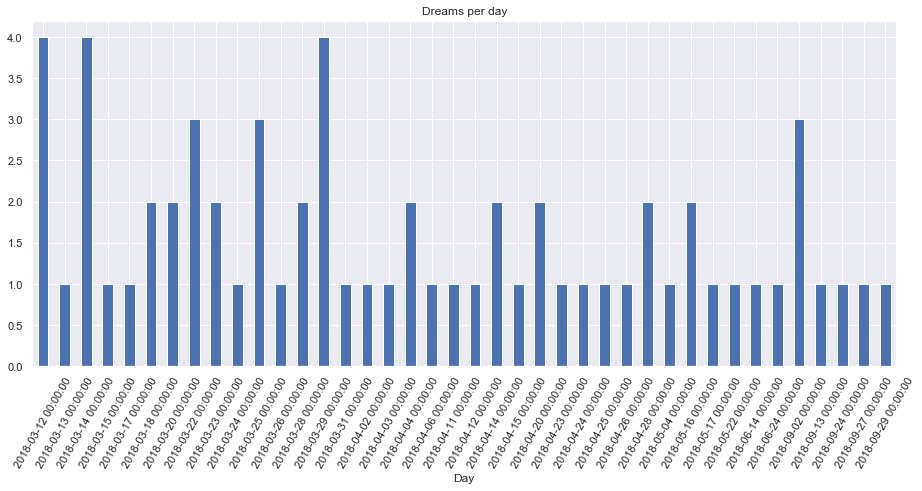

In [45]:
# number of dreams per day, chronologically
n_dreams = data['time_1'].apply(lambda x: x.replace(microsecond=0, hour=0, minute=0, second=0)).value_counts().sort_index()

# plot
n_dreams.plot(kind='bar')

plt.title("Dreams per day")
plt.xlabel("Day")
plt.xticks(rotation=60)
# plt.xticks(list(n_dreams.index.astype(str)))
plt.subplots_adjust(left=0, bottom=-0.2, right=2, top=1, wspace=0, hspace=0)
plt.show()


In [46]:
# distribution by gender
data['gender'].value_counts()

female    40
male      24
Name: gender, dtype: int64

In [47]:
data.columns

Index(['code_1', 'title', 'dream', 'time_1', 'code_2', 'code_3',
       'code_or_time', 'time_2', 'links', 'links_or_emotion', 'type_of_dream',
       'language', 'gender', 'birthday', 'civil_state', 'sexuality',
       'laterality', 'degree', 'profession', 'born_in', 'code_4', 'living_in',
       'code_5', 'code_6', 'nan_column', 'topics', 'why_dream'],
      dtype='object')

In [48]:
# type of dreams
data['type_of_dream'].value_counts()

bizarre         24
mundane         10
lucid            6
transcendent     3
nightmare        3
happy            2
eureka           2
fear             2
precognitiv      2
neutral          1
surprised        1
disgusted        1
erotic           1
Name: type_of_dream, dtype: int64

In [49]:
# languages
data['language'].value_counts()

es    65
en     3
de     3
Name: language, dtype: int64

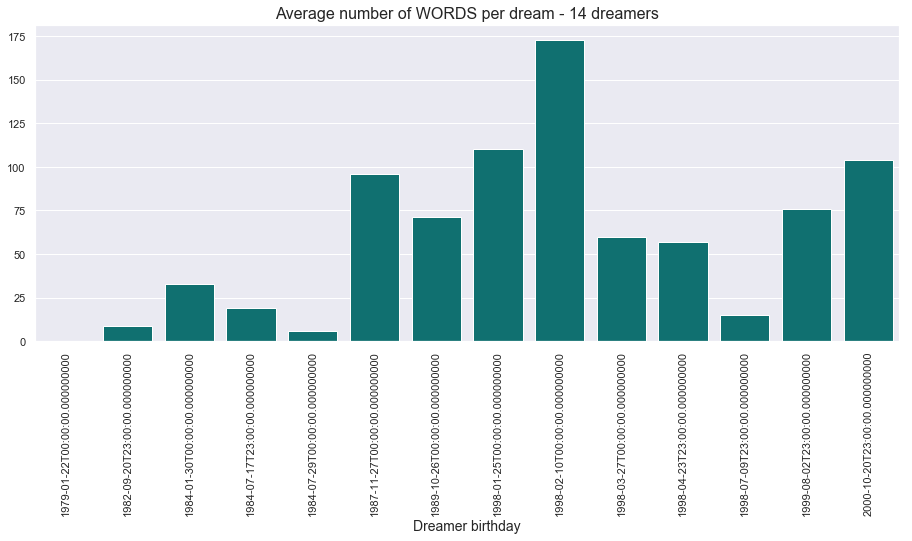

In [50]:
# Average number of words per dream 

n = 14

top_dreamers = data['birthday'].value_counts().head(n).index

from nltk.tokenize import regexp_tokenize

# function for the average number of words in a dream of a dreamer
def avg_words_dream(birthday):
    length_dream = []
    for i in data[data['birthday'] == birthday].dream:
        length_dream.append(len(regexp_tokenize(i, '\w+')))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_words_dream(i) for i in top_dreamers], color='teal')
plt.title("Average number of WORDS per dream - {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer birthday", fontsize=14)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.show()

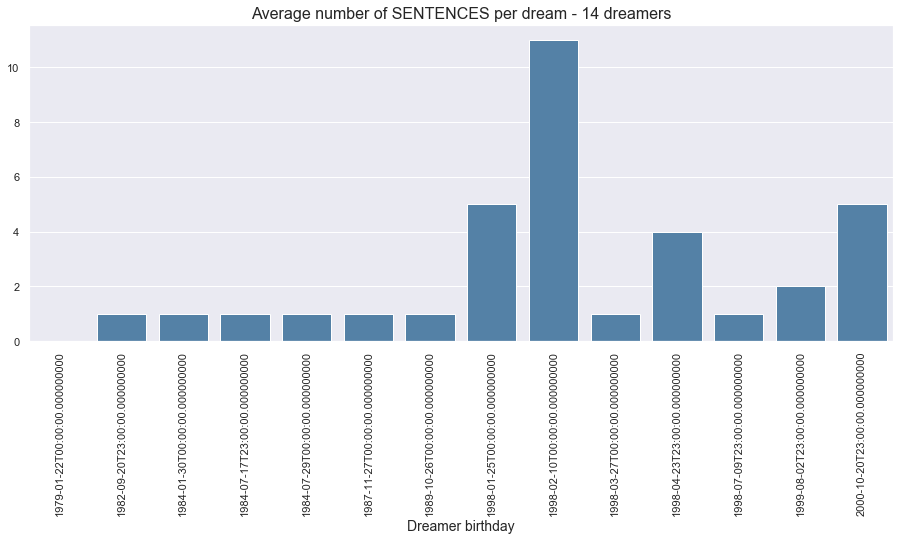

In [51]:
# Average number of sentences per dream 

n = 14

top_dreamers = data['birthday'].value_counts().head(n).index

from nltk.tokenize import sent_tokenize

# function for the average number of words in a dream of a dreamer
def avg_sentences_dream(birthday):
    length_dream = []
    for i in data[data['birthday'] == birthday].dream:
        length_dream.append(len(sent_tokenize(i)))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_sentences_dream(i) for i in top_dreamers], color='steelblue')
plt.title("Average number of SENTENCES per dream - {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer birthday", fontsize=14)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.show()

In [52]:
# example
data[data['birthday'] == '2000-10-20T23:00:00.000000000'].dream.tolist()[0]

'En mi sueño yo dormía en el pasto, y una persona me alimentaba todos los días, tenía amigas “vacas” pero todos esos factores se me hacían normal. Pasaron semanas de yo ser alimentada y de convivir con las otras vacas y un día nos llevaron a un cuarto. Empecé a sentir que era como cuando Hitler mato a los judios. Todas estábamos nerviosas y asustadas y un hombre como de 30 años entró al cuarto y empezó a dispararnos una por una. Ahí sentí como si estuviésemos en una de las escuelas donde ha habido tiroteos. No me podía mover no podía respirar no podía hacer nada mientras todos a mi alrededor se movían. Pasó un minuto que se sintió eterno y en eso abrí los ojos. Al abrir los ojos yo seguía sintiendo que alguien me quería matar y no podía nuevamente ni moverme, ni un solo dedo. Lo que quería era gritar por ayuda pero no podía. Pasó un rato y por fin me pude despertar y darme cuenta que todo había sido solo un sueño'

In [53]:
# sentences
sent_tokenize(data[data['birthday'] == '2000-10-20T23:00:00.000000000'].dream.tolist()[0])

['En mi sueño yo dormía en el pasto, y una persona me alimentaba todos los días, tenía amigas “vacas” pero todos esos factores se me hacían normal.',
 'Pasaron semanas de yo ser alimentada y de convivir con las otras vacas y un día nos llevaron a un cuarto.',
 'Empecé a sentir que era como cuando Hitler mato a los judios.',
 'Todas estábamos nerviosas y asustadas y un hombre como de 30 años entró al cuarto y empezó a dispararnos una por una.',
 'Ahí sentí como si estuviésemos en una de las escuelas donde ha habido tiroteos.',
 'No me podía mover no podía respirar no podía hacer nada mientras todos a mi alrededor se movían.',
 'Pasó un minuto que se sintió eterno y en eso abrí los ojos.',
 'Al abrir los ojos yo seguía sintiendo que alguien me quería matar y no podía nuevamente ni moverme, ni un solo dedo.',
 'Lo que quería era gritar por ayuda pero no podía.',
 'Pasó un rato y por fin me pude despertar y darme cuenta que todo había sido solo un sueño']

20 most common words used, in general (excluding stopwords):

 [('casa', 25), ('mamá', 15), ('bien', 14), ('ayer', 14), ('amiga', 13), ('podía', 12), ('desperté', 12), ('si', 11), ('ahí', 10), ('carro', 10), ('ver', 9), ('después', 9), ('entonces', 9), ('quería', 9), ('salir', 9), ('sentía', 8), ('luego', 8), ('solo', 7), ('mejor', 7), ('amigas', 7)] 



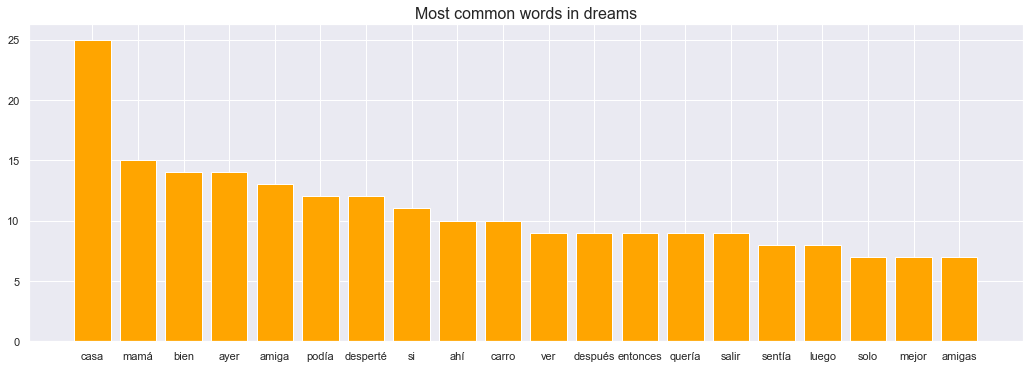

In [54]:
# Most used words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# stopwords
# spanish
stopwords_list = stopwords.words('spanish')
other_stopwords_spanish = ['sueño', 'soñé', 'soñado', 'iba']  # could go on..
stopwords_list.extend(other_stopwords_spanish)

# english
stopwords_list.extend(stopwords.words('english'))
other_stopwords_english = ['dream', 'dreamt', 'dreaming']   # could go on..
stopwords_list.extend(other_stopwords_english)

# german
stopwords_list.extend(stopwords.words('german'))
other_stopwords_german = ['träume', 'zu träumen']   # could go on..
stopwords_list.extend(other_stopwords_german)

################################

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in data.dream]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords_list]


# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 20

# n most common words (in general)
most_common = counter.most_common(n)
print("{} most common words used, in general (excluding stopwords):\n\n {}".format(n, most_common), "\n")

# plot
[plt.bar(i, j, color='orange') for (i, j) in most_common]

plt.title("Most common words in dreams", fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.1, right=2.3, top=1, wspace=0, hspace=0)
plt.show()


20 most common words used for this individual (excluding stopwords):

 [('embarazada', 5), ('aurora', 4), ('nunca', 4), ('teresa', 3), ('bien', 3), ('ayer', 3), ('amigos', 3), ('entonces', 3), ('hijos', 3), ('papá', 3), ('van', 3), ('sé', 2), ('solo', 2), ('arturo', 2), ('barco', 2), ('después', 2), ('dos', 2), ('mientras', 2), ('así', 2), ('zapato', 2)] 



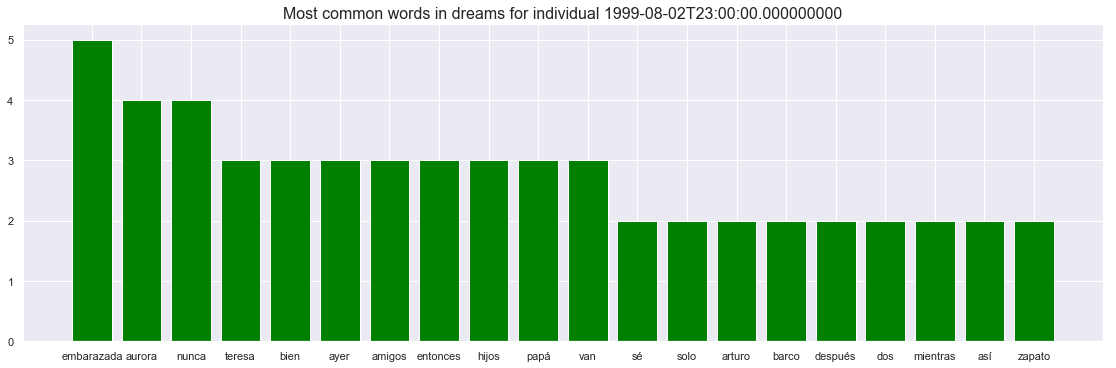

In [55]:
# For an individual

individual = '1999-08-02T23:00:00.000000000'
dreams_ind = data[data['birthday'] == individual].dream

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in dreams_ind]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords_list]


# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 20

# n most common words (in general)
most_common = counter.most_common(n)
print("{} most common words used for this individual (excluding stopwords):\n\n {}".format(n, most_common), "\n")

# plot
[plt.bar(i, j, color='green') for (i, j) in most_common]

plt.title("Most common words in dreams for individual {}".format(individual), fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.1, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

In [56]:
dreams_ind 
# in this case 'nunca' should be a stopword, but in the other hand it could be present througout the descriptions...

9     Sé que no solo soñé con esto pero es mi recuer...
20    Ayer soñé que iba a visitar a mi ex me ha sona...
21    Ayer soñé que estaba como en un tipo rápidos y...
24    Soñé que todos los que son o habían sido mis a...
42    Soñé que estaba embarazada pero los hijos iban...
52    Soñé que cuando viajaba de Torreón a Monterrey...
63    Ayer soñé que estaba debatiendo entre dos dime...
Name: dream, dtype: object

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


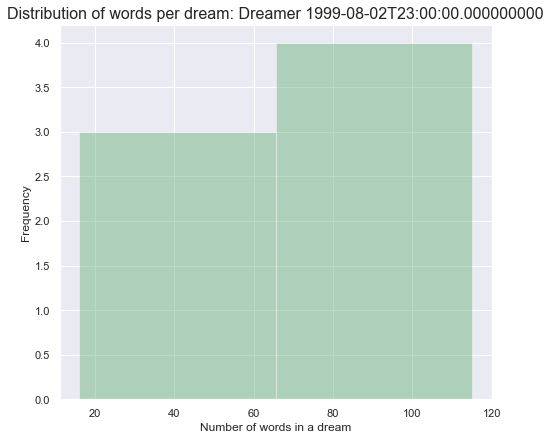

In [57]:
# distribution of words per dream - for individuals

from nltk.tokenize import regexp_tokenize

# number of words per dream
w_per_dream = [len(regexp_tokenize(i, '\w+')) for i in dreams_ind]

sns.distplot(w_per_dream, kde=False, color='g')
plt.title("Distribution of words per dream: Dreamer {}".format(individual), fontsize=16)
plt.xlabel("Number of words in a dream")
plt.ylabel("Frequency")
plt.subplots_adjust(left=0, bottom=-0.3, right=1, top=1, wspace=0, hspace=0)
plt.show()

### 3) Topics in dreams - Named Entity Recognition
<a id="topics"></a>

In [58]:
# SpaCy NER
import spacy

nlp = spacy.load('es')

print(nlp.entity)

# dream 
n = 5
print(dreams_ind.iloc[n])

doc = nlp(dreams_ind.iloc[n])

print("\n", doc.ents, "\n")

for i in doc.ents:
    print(i,":", i.label_)   # --> treinar e importar vetores meus...

Soñé que cuando viajaba de Torreón a Monterrey se me olvidaban mis maletas y mi papá corría detrás de la van para dármelas pero el chofer no se quería parar y decía que nos tenía que alcanzar, luego mi papá se regresaba por el carro y rebasaba la van y lograba que el chofer se parara. Después los que íbamos en la van entrábamos a un centro
comercial y cuando salíamos ya no había nadie, nos habían abandonado. Los que estábamos ahí conquistamos el lugar y nos adueñamos de un local cada uno. Luego mi mamá llegaba y nos encontraba pero nosotros les decíamos que esa era nuestra vida ahora.

 (Soñé, Torreón, Monterrey, Después, Los que estábamos ahí conquistamos, Luego mi mamá) 

Soñé : LOC
Torreón : LOC
Monterrey : LOC
Después : LOC
Los que estábamos ahí conquistamos : MISC
Luego mi mamá : MISC


In [59]:
#polyglot
from polyglot.text import Text

# dream 
n = 5
dream_number = dreams_ind.iloc[n]
ptext = Text(dream_number)
print(ptext, "\n")

print(ptext.entities)  # melhor

########OR

entities = [(ent.tag, ' '.join(ent)) for ent in ptext.entities]
entities

Soñé que cuando viajaba de Torreón a Monterrey se me olvidaban mis maletas y mi papá corría detrás de la van para dármelas pero el chofer no se quería parar y decía que nos tenía que alcanzar, luego mi papá se regresaba por el carro y rebasaba la van y lograba que el chofer se parara. Después los que íbamos en la van entrábamos a un centro
comercial y cuando salíamos ya no había nadie, nos habían abandonado. Los que estábamos ahí conquistamos el lugar y nos adueñamos de un local cada uno. Luego mi mamá llegaba y nos encontraba pero nosotros les decíamos que esa era nuestra vida ahora. 

[I-LOC(['Torreón']), I-LOC(['Monterrey']), I-PER(['salíamos'])]


[('I-LOC', 'Torreón'), ('I-LOC', 'Monterrey'), ('I-PER', 'salíamos')]